# Python tutorial

### This tutorial loosely follows the topics covered in the Octave tutorial in week 2 of the course

#### The modules needed to run this tutorial are imported below

In [74]:
%matplotlib inline
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import imageio
import visvis as vv

## Elementary arithmetic operations
##### Python is capable of working like a calculator with some caveats.

In [5]:
5+6

11

In [4]:
3-2

1

In [5]:
5*9

45

##### Beware: integer division rounds the result down! You can implicitly convert to a float by adding a '.'

This is no longer the case, as you can see below.

In [75]:
1/2

0.5

In [8]:
1./2

0.5

##### Exponents use the '**' operator

^ is bitwise exclusive or.
https://docs.python.org/3.4/library/operator.html

In [12]:
2**6

64

## Logical operations
##### Every object has a boolean value returned from bool(). The following elements are false:

* None
* False
* 0
* Empty collections: “”, (), [], {}

In [17]:
1 and 0 # AND

0

In [18]:
1 or 0 # OR

1

In [19]:
1 != 0 # XOR

True

In [20]:
bool([]) and True # False

False

In [21]:
a='foo'
b='bar'
bool(a) != bool(b)

False

In [22]:
b=None
bool(a) != bool(b)

True

## Python variables and types
### Displaying variables
##### Variables are displayed on the console by typing the variable name

In [23]:
b=3
b

3

In [77]:
from math import pi
b=pi
b

3.141592653589793

floating point numbers are formatted in two ways:

The 'old' way (pre-python 2.7):

which no longer works in Python 3

In [79]:
print '%1.4f'%b

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('%1.4f'%b)? (<ipython-input-79-26b971d51344>, line 1)

##### The 'new' way (python 2.7+):

which also doesn't work in Python 3

In [27]:
print '{:1.5}'.format(b)

SyntaxError: invalid syntax (<ipython-input-27-ec4a4e87973a>, line 1)

The way that works in Python 3

In [78]:
'{:1.5}'.format(b)

'3.1416'

## Numpy basics 
### Vectors and matrices

In [6]:
a=np.array([[1,2],[3,4],[5,6]]) # 3x2 numpy matrix
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [32]:
v=[1,2,3]   # ordinary python list
v

[1, 2, 3]

In [33]:
v=np.array([1,2,3]) # numpy array
v

array([1, 2, 3])

##### Use `np.arange(start, stop, increment)` to generate a sequence of floats in a numpy array

In [34]:
v=np.arange(1,2,0.1)
v

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

##### Use `tolist()` to convert a numpy array to a python list

In [35]:
v.tolist()

[1.0,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000004,
 1.5000000000000004,
 1.6000000000000005,
 1.7000000000000006,
 1.8000000000000007,
 1.9000000000000008]

##### The `range()` built-in function generates integer sequences in a `list`

note that range in Python 3 is xrange in Python 2, i.e. it returns a iterable object, not a list.

In [38]:
v=range(1,6)
v

range(1, 6)

In [39]:
list(v)

[1, 2, 3, 4, 5]

##### numpy's `linspace` function generates a non-integer sequence with a specific number of elements

In [40]:
v=np.linspace(1,2,11)
v

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ])

## Comprehensions
### list comprehensions
##### List comprehensions allow you to create iterative code without using a loop

In [41]:
v=[1,2,3]
[e**2 for e in v]

[1, 4, 9]

In [42]:
[e**2 for e in v if e%2 !=0]

[1, 9]

In [43]:
[e**2 if e%2 != 0 else -1 for e in v]

[1, -1, 9]

### dictionary comprehensions
##### Dictionary comprehensions allow to generate dictionaries without a loop

In [49]:
d = {'a':1, 'b':2, 'c':3}   
{v: k for k, v in d.items()}   # swap keys and values

{1: 'a', 2: 'b', 3: 'c'}

### set comprehension

##### Set comprehensions generate sets in a similar way

A set is a collection which is unordered and unindexed. In Python sets are written with curly brackets (like dictionaries, but not keys and values).

In [50]:
{x**2 for x in [1, 1, 2]}

{1, 4}

## Special matrix functions

In [51]:
ones=np.ones((3,2))
ones

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [52]:
3*ones

array([[ 3.,  3.],
       [ 3.,  3.],
       [ 3.,  3.]])

In [53]:
np.zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

##### Generate an array of uniform random numbers

"random samples from a uniform distribution over [0, 1)."

In [9]:
np.random.rand(3,2)

array([[0.71300919, 0.51889563],
       [0.91735981, 0.60755766],
       [0.09771029, 0.43366595]])

But better to use Generator.random

In [82]:
rng = np.random.default_rng()

rng.random((3, 2))

array([[0.29922557, 0.87061662],
       [0.41453976, 0.48810545],
       [0.63335521, 0.73501071]])

In [80]:
import sys

print(sys.version)

np.version.version

3.6.10 |Anaconda, Inc.| (default, May  7 2020, 23:06:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


'1.18.1'

##### Generate an array of normal random numbers

i.e. a normal (Gaussian) distribution. (-.5, .5)

In [11]:
np.random.randn(3,2)

array([[-1.62121016,  0.33446532],
       [ 2.19281902, -1.54019972],
       [ 1.69925238,  1.89858526]])

In [12]:
id=np.eye(3)
id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
3*id

array([[3., 0., 0.],
       [0., 3., 0.],
       [0., 0., 3.]])

## Moving data around
### shape and size of a matrix

In [14]:
a=np.random.rand(3,2)
a

array([[0.13675644, 0.98474066],
       [0.00714989, 0.87038329],
       [0.07548639, 0.5321329 ]])

In [15]:
a.shape

(3, 2)

In [16]:
a.size

6

## Loading files in python

##### Reading the contents of a simple text file

In [18]:
file=open('/Users/daviddriscoll/Documents/GitHub/ml-coursera-python-assignments/Exercise6/Data/emailSample1.txt', 'r')
file_contents=file.read()
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

##### Loading image files

this isn't working

In [6]:
import imageio

data = imageio.imread('/Users/daviddriscoll/Documents/GitHub/ml-coursera-python-assignments/Exercise7/Data/bird_small.png')
vv.imshow(data)

##### Loading the contents of a csv file

better to use pandas?

In [83]:
data = np.('/Library/Ruby/Gems/2.6.0/gems/test-unit-3.2.9/test/fixtures/header-label.csv', delimiter=',')
data

ValueError: could not convert string to float: 'label'

##### Loading a Matlab formatted file

In [5]:
data = scipy.io.loadmat('/Users/daviddriscoll/Documents/GitHub/ml-coursera-python-assignments/Exercise3/Data/ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

## Manipulating matrices
### Indexing and Slicing

#### `a[start:end]` -  items start through end-1
#### `a[start:]` - items start through the rest of the array
#### `a[:end]` -  items from the beginning through end-1
#### `a[:]` - a copy of the whole array
##### There is also the step value, which can be used with any of the above:
#### `a[start:end:step]` - start through not past end, by step

In [6]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
x[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
x[1:]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
x[:5]

array([0, 1, 2, 3, 4])

In [10]:
x[2]

2

In [11]:
x[1:7:2]

array([1, 3, 5])

#### Negative indices
##### `a[-1]` - last item in the array
##### `a[-2:]` - last two items in the array
##### `a[:-2]` - everything except the last two items

In [12]:
x[:-2]

array([0, 1, 2, 3, 4, 5, 6, 7])

##### 2d matrices are accessed in the row, column order

In [13]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
arr2d[2]

array([7, 8, 9])

In [15]:
arr2d[0]

array([1, 2, 3])

In [16]:
arr2d[0,1]

2

## Boolean indexing

#### Index selection can be done by filtering elements with boolean values

In [17]:
mat = np.array(['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']).reshape((3,3))
mat

array([['The', 'quick', 'brown'],
       ['fox', 'jumped', 'over'],
       ['the', 'lazy', 'dog']], dtype='<U6')

In [18]:
rand = np.random.randn(3,3)>0
rand

array([[False,  True, False],
       [ True,  True,  True],
       [ True, False, False]])

In [19]:
mat[rand]

array(['quick', 'fox', 'jumped', 'over', 'the'], dtype='<U6')

## Flattening

### Reshaping from a higher dimensional to one dimensional order is called flattening

In [20]:
arr = np.arange(9).reshape((3,3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

##### The `flatten()` function returns a copy of the array

In [21]:
arr.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

##### flattening can be done columnwise

this no longer works

In [84]:
arr.flatten(1)

ValueError: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead

##### the `ravel()` function doesn't return a copy of the underlying data

In [24]:
arr.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## Vector assignments

### Python doesn't create copies of underlying data on assignment statements

In [25]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

##### create a reference to some elements in the array and reassign them

In [26]:
slice=arr[4:8]
slice

array([4, 5, 6, 7])

In [27]:
slice[:]=-5
slice

array([-5, -5, -5, -5])

In [28]:
slice[1]=50
slice

array([-5, 50, -5, -5])

In [29]:
arr

array([ 0,  1,  2,  3, -5, 50, -5, -5,  8,  9])

###### now create a copy of the array explicitly and reassign

In [30]:
arr_copy=arr.copy()
arr_copy

array([ 0,  1,  2,  3, -5, 50, -5, -5,  8,  9])

In [31]:
arr_copy[4:8]=20
arr_copy

array([ 0,  1,  2,  3, 20, 20, 20, 20,  8,  9])

##### The original array is unchanged

In [32]:
arr

array([ 0,  1,  2,  3, -5, 50, -5, -5,  8,  9])

## Horizontal and vertical concatenation
### There are two ways to concatenate

In [33]:
mat = np.array(['The', 'quick', 'brown', 'fox'])
mat2 = np.array(['jumped', 'over', 'the', 'lazy'])

##### Method 1: Use stacking

In [34]:
np.hstack((mat,mat2))

array(['The', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy'],
      dtype='<U6')

In [35]:
np.vstack((mat,mat2))

array([['The', 'quick', 'brown', 'fox'],
       ['jumped', 'over', 'the', 'lazy']], dtype='<U6')

In [36]:
np.column_stack((mat,mat2))

array([['The', 'jumped'],
       ['quick', 'over'],
       ['brown', 'the'],
       ['fox', 'lazy']], dtype='<U6')

##### Method 2: Use the `concatenate()` function applied to an axis

In [85]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [86]:
np.concatenate((arr,arr), axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [87]:
np.concatenate((arr,arr), axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
arr = np.arange(5)
np.concatenate((arr,arr), axis=0)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

why didn't this concatenate around the x axis? because it's a one-dimensional array?

## Matrix multiplication

In [41]:
x=np.array([[1,2,3], [4,5,6], [7,8,9]])
y=np.array([[1,2,3], [4,5,6], [7,8,9]])
np.dot(x,y)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

##### Matrix multiplication is done using the `dot()` function

In [42]:
x.dot(y)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

##### Element-wise multiplication using the '*' operator

In [43]:
x*y

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

##### Element-wise squaring

In [44]:
x**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

##### Element-wise reciprical

In [45]:
1./x

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667],
       [0.14285714, 0.125     , 0.11111111]])

##### Element-wise logarithms/exponents

In [46]:
np.log(x)

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 1.79175947],
       [1.94591015, 2.07944154, 2.19722458]])

In [47]:
np.exp(x)

array([[2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 4.03428793e+02],
       [1.09663316e+03, 2.98095799e+03, 8.10308393e+03]])

##### Element-wise addition

In [48]:
1+x

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

### Transpose of a matrix

In [49]:
x.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

### Maximum and minimum of matrix values

In [50]:
np.max(x)

9

In [51]:
np.min(x)

1

### Sum and product of all elements

In [52]:
np.sum(x)

45

In [53]:
np.sum(x,axis=0)

array([12, 15, 18])

In [54]:
np.sum(x,axis=1)

array([ 6, 15, 24])

In [55]:
np.sum(x)

45

In [56]:
np.product(x)

362880

In [57]:
np.product(x,axis=0)

array([ 28,  80, 162])

In [58]:
np.product(x,axis=1)

array([  6, 120, 504])

### Inverse and pseudo-inverse of a matrix

In [59]:
x=2*np.eye(3)
np.linalg.inv(x)

array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5]])

In [60]:
np.linalg.pinv(x)

array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 0.5]])

## Plotting data with matplotlib

### Creating/clearing figures|
##### Plots reside within figures

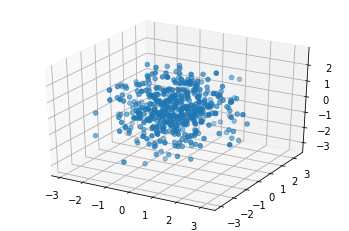

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.randn(500), np.random.randn(500), np.random.randn(500), marker='o')

### Subplots

this didn't work

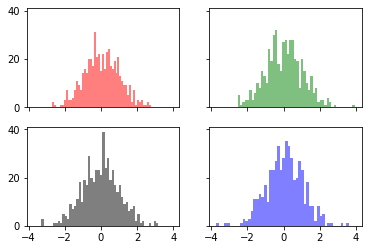

In [92]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
color = (e for e in ['r', 'g', 'k', 'b'])
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color=next(color), alpha=0.5)

In [64]:
## Line color, labels, title and legend

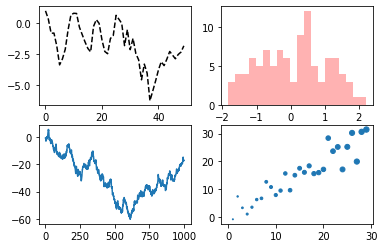

In [93]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(randn(50).cumsum(), 'k--')
axes[0,1].hist(randn(100), bins=20, color='r', alpha=0.3)
axes[1,1].scatter(np.arange(30), np.arange(30) + 3 * randn(30), np.arange(30))
axes[1,0].plot(randn(1000).cumsum())

## Control statements
### For loops

In [67]:
li = ['a', 'b', 'e']
for e in li:
    print(e)

a
b
e


In [68]:
d = enumerate(li)
for k,v in d:
    print(k,v)

0 a
1 b
2 e


### While loops

In [70]:
count = 0
while (count <= 3):
   print('The count is:', count)
   count += 1

The count is: 0
The count is: 1
The count is: 2
The count is: 3


### break statement

In [71]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print (n, 'equals', x, '*', n/x)
            break
        else:
        # loop fell through without finding a factor
            print (n, 'is a prime number')

3 is a prime number
4 equals 2 * 2.0
5 is a prime number
5 is a prime number
5 is a prime number
6 equals 2 * 3.0
7 is a prime number
7 is a prime number
7 is a prime number
7 is a prime number
7 is a prime number
8 equals 2 * 4.0
9 is a prime number
9 equals 3 * 3.0


### if-elif-else statement

In [73]:
var = 100
if var == 200:
   print ("1 - Got a true expression value")
   print (var)
elif var == 150:
   print ("2 - Got a true expression value")
   print (var)
elif var == 100:
   print ("3 - Got a true expression value")
   print (var)
else:
   print ("4 - Got a false expression value")
   print (var)

3 - Got a true expression value
100
